In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
import os

In [2]:
def sample_frames(frames, num_frames):
  indices = np.random.choice(len(frames), num_frames, replace=False)
  indices.sort()
  return [frames[index] for index in indices]

In [ ]:
def crop_center_square(frame):
  y, x = frame.shape[0:2]
  min_dim = min(y, x)
  start_x = (x // 2) - (min_dim // 2)
  start_y = (y // 2) - (min_dim // 2)
  return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

def load_video(path, max_frames=0, resize=(224, 224)):
  cap = cv2.VideoCapture(path)
  frames = []
  try:
    while True:
      ret, frame = cap.read()
      if not ret:
        break
      # frame = crop_center_square(frame)
      # frame = cv2.resize(frame, resize)
      frame = frame[:, :, [2, 1, 0]]
      frames.append(frame)

      if len(frames) == max_frames:
        break
  finally:
    cap.release()
    # sampled_frames = sample_frames(frames, 500)

  return np.array(frames, dtype=np.float16) / 255.0

In [4]:
videos = list()
labels = list()
file_counter = 0
for folder in os.listdir('./data/JHMDB_video/ReCompress_Videos'):
    if folder != '.DS_Store':
        for file in os.listdir('./data/JHMDB_video/ReCompress_Videos/' + folder):
            if file.endswith('.avi'):
                videos.append(load_video('./data/JHMDB_video/ReCompress_Videos/' + folder + '/' + file))
                labels.append(folder)
                file_counter += 1
            if file_counter == 1:
                break


Error: Canceled future for execute_request message before replies were done

In [8]:
inp = np.array([a,b])

In [9]:
# inp = inp.reshape(2,500,-1)
# inp.shape

In [10]:
model = keras.Sequential()
model.add(layers.LSTM(500, input_shape=(224,224)))
model.add(layers.Dense(10))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(inp, np.array([1,2]), epochs=3, batch_size=64)
model.summary()

2022-04-20 18:42:59.229997: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-04-20 18:42:59.230093: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: wk3d
2022-04-20 18:42:59.230118: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: wk3d
2022-04-20 18:42:59.230354: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.103.1
2022-04-20 18:42:59.230429: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.103.1
2022-04-20 18:42:59.230450: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.103.1
2022-04-20 18:42:59.231511: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operati

Epoch 1/3


ValueError: in user code:

    File "/home/rvk7895/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/rvk7895/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rvk7895/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/rvk7895/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/home/rvk7895/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/rvk7895/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224), found shape=(None, 500, 224, 224, 3)


In [32]:
lstm = tf.keras.layers.LSTM(500, input_shape=(224,224,3))
output = lstm(inp)

2022-04-20 18:32:57.234467: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1204224000 exceeds 10% of free system memory.


ValueError: Input 0 of layer "lstm_7" is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: (2, 500, 224, 224, 3)

In [2]:
import joblib

data = joblib.load('./data/videos.pkl')

In [17]:
a = [i.shape[0] for i in data[0]]

(array([ 24.,  11.,  71.,  15.,  37.,  17., 159.,  15.,  42., 488.]),
 array([15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. ]),
 <BarContainer object of 10 artists>)

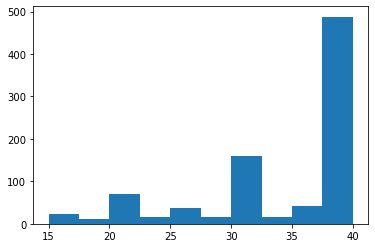

In [18]:
import matplotlib.pyplot as plt

plt.hist(a)

In [22]:
def add_pad(video, pad_size):
    y, x = video.shape[1:3]
    pads = np.zeros((pad_size, y, x, 3), dtype=np.ubyte)
    return np.concatenate([pads, video, pads])

In [23]:
max_frames = max([i.shape[0] for i in data[0]])

for idx in range(len(data[0])):
    data[0][idx] = add_pad(data[0][idx],(max_frames - data[0][idx].shape[0])/2)

TypeError: 'float' object cannot be interpreted as an integer